Cargamos las librerías, el conjunto de datos y algunas variables que emplearemos durante el proceso:

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

df = pd.read_csv('./processed_data/houses_integrated.csv')

# Definimos las opciones de visualizacion
pd.set_option('display.max_columns', 500)

# Definimos un listado de colores para visualizaciones
clr = {'pr': '#5F66A1', 'yw': '#f3ca75',
       'mg': '#c874b9', 'gn': '#599d70', 'br': '#636261'}
b = '\033[94m'  # para texto azul
o = '\033[93m'  # para texto naranja
n = '\033[0m'   # para texto normal

# Omitimos los warnings
warnings.filterwarnings('ignore')

En esta fase verificaremos la calidad de los datos por medio de una serie de procesos.

# Estandarización de variables

## Estudio de variables a estandarizar

En este apartado se procede a estandarizar las variables, corrigiendo su tipo, y normalizando sus valores, (entendiendo por normalizar, asignarles el valor más representativo).

*NOTA: En este apartado no se tratarán ni los missing values ni los outliers. Su gestión se deja para más adelante.*

Empezaremos analizando cómo han sido asignadas las variables:

In [2]:
df.dtypes

house_id               int64
ad_description        object
price                  int64
bath_num              object
condition             object
construct_date       float64
energetic_certif      object
floor                 object
ground_size          float64
heating               object
house_type            object
m2_real                int64
m2_useful            float64
orientation           object
room_num              object
air_conditioner        int64
balcony                int64
built_in_wardrobe      int64
chimney                int64
garage                object
garden                 int64
kitchen              float64
lift                 float64
reduced_mobility       int64
storage_room           int64
swimming_pool          int64
terrace                int64
unfurnished          float64
loc_zone              object
loc_district          object
loc_city              object
loc_neigh             object
pop_total              int64
pop_0-19               int64
pop_20-64     

De la lista superior, extraemos qué variables estudiaremos en la estandarización. En concreto, nos centraremos en 4 grupos: 
+ Por un lado estandarizaremos las variables numéricas que no hayan asignado como tal
+ Por otro lado, estudiaremos las variables categóricas
+ A continuación estudiaremos las variables categoricas binarias, es decir, booleanas
+ Finalmente, nos centraremos en las variables de texto ligadas a la ubicación

<br />

**VARIABLES NUMÉRICAS NO ASIGNADAS COMO TAL**

+ <font color=#5F66A1>*bath_num*<font>
+ <font color=#5F66A1>*room_num*<font>
+ <font color=#5F66A1>*garage*<font>


**VARIABLES CATEGÓRICAS**

+ <font color=#5F66A1>*condition*<font>
+ <font color=#5F66A1>*energetic_certif*<font>
+ <font color=#5F66A1>*floor*<font>
+ <font color=#5F66A1>*heating*<font>
+ <font color=#5F66A1>*house_type*<font>
+ <font color=#5F66A1>*orientation*<font>


**VARIABLES BOOLEANAS**

+ <font color=#5F66A1>*air_conditioner*<font>
+ <font color=#5F66A1>*balcony*<font>
+ <font color=#5F66A1>*built_in_wardrobe*<font>
+ <font color=#5F66A1>*chimney*<font>
+ <font color=#5F66A1>*garden*<font>
+ <font color=#5F66A1>*kitchen*<font>
+ <font color=#5F66A1>*lift*<font>
+ <font color=#5F66A1>*reduced_mobility*<font>
+ <font color=#5F66A1>*storage_room*<font>
+ <font color=#5F66A1>*swimming_pool*<font>
+ <font color=#5F66A1>*terrace*<font>
+ <font color=#5F66A1>*unfurnished*<font>


**VARIABLES DE TEXTO LIGADAS A LA UBICACIÓN**

+ <font color=#5F66A1>*loc_zone*<font>
+ <font color=#5F66A1>*loc_district*<font>
+ <font color=#5F66A1>*loc_city*<font>
+ <font color=#5F66A1>*loc_neigh*<font>

## Estandarización de variables numéricas

### <font color=#5F66A1>bath_num</font>

In [3]:
print(df.bath_num.unique())

['4' '2' '1' 'sin baños' '3' '5' '17' '6' '9' '7' '8' '11' '10' '15' '12']


Vemos como la ausencia de baños se identifica como 'sin baños', en forma de texto. Lo corregimos, y definimos la variable como numérica:

In [4]:
df['bath_num'] = (df['bath_num']
                  .str.replace('sin baños','0')
                  .astype('int64')
                 )

### <font color=#5F66A1>room_num</font>

In [5]:
print(df.room_num.unique())

['3' '4' '2' 'sin habitación' '5' '1' '8' '9' '6' '12' '10' '7' '11' '14'
 '17' '20' '34' '13']


Aquí tambien la ausencia de habitaciones se identifica en forma de texto, como 'sin habitación'. Lo corregimos, y definimos la variable como numérica:

In [6]:
df['room_num'] = (df['room_num']
                   .str.replace('sin habitación','0')
                   .astype('int64')
                  )

### <font color=#5F66A1>garage</font>

In [7]:
print(df.garage.unique()[:10])

['plaza de garaje incluida en el precio' nan
 'plaza de garaje por 9.500 eur adicionales'
 'plaza de garaje por 15.000 eur adicionales'
 'plaza de garaje por 50.000 eur adicionales'
 'plaza de garaje por 24.451 eur adicionales'
 'plaza de garaje por 24.452 eur adicionales'
 'plaza de garaje por 12.000 eur adicionales'
 'plaza de garaje por 33.000 eur adicionales'
 'plaza de garaje por 400.000 eur adicionales']


Vemos que la variable refleja el precio de la plaza de garaje en forma de texto. Por lo tanto, extraemos el precio del texto y establecemos que la variable sea numérica:

In [8]:
df['garage'] = (df['garage']
                .str.replace('plaza de garaje incluida en el precio','0')
                .str.replace('.','')
                .str.extract('(\d{1,4})')
                .astype('float64')
               )

## Estandarización de variables categóricas

### <font color=#5F66A1>condition</font>

In [9]:
print(df.condition.unique())

['segunda mano/buen estado' 'segunda mano/para reformar' nan
 'promoción de obra nueva']


Vemos que hay 3 posibles categorías. Redefinimos los nombres de las categorías para mejorar su interpretabilidad.

In [10]:
df = df.replace({'condition':
                 {
                  'segunda mano/buen estado':'buen estado',
                  'segunda mano/para reformar':'para reformar',
                  'promoción de obra nueva':'obra nueva'
                 }})

df['condition'] = df['condition'].astype('category')

### <font color=#5F66A1>energetic_certif</font>

In [11]:
print(df.energetic_certif.unique())

['en trámite' 'no indicado' nan 'inmueble exento']


No requiere ningun tratamiento salvo definirla como categórica:

In [12]:
df['energetic_certif'] = df['energetic_certif'].astype('category')

### <font color=#5F66A1>floor</font>

In [13]:
print(df.floor.unique()[:15])

['3 plantas' 'planta 1ª exterior' '2 plantas' nan 'bajo exterior'
 'planta 3ª exterior' 'planta 5ª exterior' 'planta 2ª exterior' '1 planta'
 'planta 1ª' 'planta 4ª exterior' 'planta 2ª' 'planta 3ª' 'bajo'
 'planta 4ª']


Vemos que, a grandes rasgos, esta variable esconde lo que podrían ser 3 variables distintas:

+ Número de planta en la que se encuentra el domicilio
+ Indicador de si la planta está en el interior o en el exterior
+ Número de plantas de las que consta el domicilio

Por lo tanto, se procede a dividir la variable en 3. 

<br />

Empezamos generando la variable booleana <font color=#5F66A1>__indoor__</font>, que tomará el valor True si el domicilio está en el interior, y False en el caso contrario:

In [14]:
df['indoor'] = (df['floor']
                .str.contains('interior')
                .astype('category')   # no se define como bool porque aún contiene NaN
               )

print(df['indoor'].unique())

[False, NaN, True]
Categories (2, object): [False, True]


<br />

A continuación crearemos la variable <font color=#5F66A1>__floor_count__</font>, que recogerá el número de plantas de las que consta la casa.

Para ello, empezamos asignando como valor 1 a todas las casas que tengan información sobre la planta (las que estan como NaN las dejaremos por ahora tal cual, puesto que no tenemos información al respecto)

In [15]:
df['floor_count'] = np.nan
df['floor_count'][df.floor.notna()] = 1

A continuación, añadiremos la información sobre las casas con más de una planta. Para ello, seleccionaremos todas las celdas que contengan la palabra 'plantas' (en plural), y de allí extraeremos el número por medio de una expresión regular:

In [16]:
f_c = (df['floor'][df.floor.str.contains('plantas', na=False)]
       .str.extract('(\d+)')
       .astype('float64')
       .rename(columns={0:'floor_count'})
      )

Una vez hemos extraído el número de plantas de las casas con más de una, actualizamos la variable:

In [17]:
df.update(f_c)
print(df.floor_count.unique())

[ 3.  1.  2. nan  4.  5.]


<br />

Por último modificaremos la variable <font color=#5F66A1>__floor__</font>, para que solo recoja el número de planta en el que se encuentra el piso:

In [18]:
df['floor'] = (df['floor']
               .str.replace('(exterior|interior|1 planta)', '')
               .str.replace('(\d+) plantas', '')
               .str.strip()
               .str.replace('planta ', '')
               .replace('', np.nan)
               .astype('category')
              )

print(df.floor.unique())

[NaN, 1ª, bajo, 3ª, 5ª, ..., 21ª, 19ª, 30ª, 17ª, 24ª]
Length: 31
Categories (30, object): [1ª, bajo, 3ª, 5ª, ..., 19ª, 30ª, 17ª, 24ª]


Vemos que hay 30 categorías distintas, lo cual parece excesivo para diferenciar distitos números de planta. Por ello, exploramos si podemos colapsar ciertas categorías.

In [19]:
df.groupby('floor').count().sort_values('house_id',ascending=False)['house_id']

floor
1ª             4536
2ª             4130
3ª             3810
4ª             2776
5ª             1818
bajo           1465
6ª              911
7ª              456
8ª              187
entreplanta     179
9ª              130
10ª              80
11ª              51
12ª              31
14ª              27
13ª              23
15ª              16
16ª              11
sótano           11
semi-sótano       8
21ª               5
-1                4
60ª               4
18ª               4
-2                3
20ª               3
17ª               3
30ª               1
19ª               1
24ª               1
Name: house_id, dtype: int64

En vista de la dispersión de viviendas en función de la planta, se opta por colapsar todas aquellas por encima de la 7ª. Además, se hará lo propio con las plantas por debajo del 1º (entreplantas, bajos, sótanos, ...). Finalmente, se observan casos como planta núm. 60ª y 30ª, las cuales parecen errores tipográficos, por lo que se corrigen como 6ª y 3ª respectivamente:

In [20]:
df['floor'] = (df['floor']
               .str.replace('(bajo|entreplanta|semi-sótano|sótano|-1|-2)','<0ª')
               .str.replace('60ª','6ª')
               .str.replace('30ª','3ª')
               .str.replace(r'(24ª|23ª|22ª|21ª|20ª|19ª|18ª|17ª|9ª|8ª)', '>8ª')
               .str.replace(r'(16ª|15ª|14ª|13ª|12ª|11ª|10ª)', '>8ª')        
              )

print(df.floor.unique())

[nan '1ª' '<0ª' '3ª' '5ª' '2ª' '4ª' '6ª' '7ª' '>8ª']


### <font color=#5F66A1>heating</font>

In [21]:
print(df.heating.unique())

[nan 'calefacción individual: gas natural' 'calefacción individual'
 'no dispone de calefacción' 'calefacción central: gasoil'
 'calefacción individual: eléctrica'
 'calefacción individual: gas propano/butano' 'calefacción central'
 'calefacción central: gas' 'calefacción individual: gas'
 'calefacción individual: bomba de frío/calor'
 'calefacción central: gas propano/butano'
 'calefacción central: gas natural' 'calefacción individual: gasoil'
 'calefacción central: eléctrica']


Sustraemos la palabra 'calefacción' para mayor interpretabilidad, y la definimos como categórica:

In [22]:
df['heating'] = (df['heating']
                 .str.replace('calefacción ', '')
                 .astype('category')
                )

### <font color=#5F66A1>house_type</font>

In [23]:
df['house_type'] = (df['house_type']
                    .str.strip()
                    .astype('category')
                   )

df.groupby('house_type').count().sort_values('house_id',ascending=False)['house_id']

house_type
Piso                                       18312
Alquiler de Piso                            1885
Casa o chalet independiente                 1070
Casa o chalet                                856
Chalet adosado                               807
Dúplex                                       755
Ático                                        499
Chalet pareado                               392
Casa rural                                   185
Finca rústica                                142
Estudio                                      111
Alquiler de Ático                             85
Caserón                                       74
Casa de pueblo                                67
Alquiler de Dúplex                            51
Alquiler de Casa o chalet independiente       23
Alquiler de Chalet adosado                    21
Alquiler de Estudio                           20
Alquiler de Chalet pareado                    11
Alquiler de Casa o chalet                     10
Alquiler 

Vemos nuevamente, que hay excesivas categorías. Colapsamos algunos:

In [24]:
df['house_type'] = (df['house_type']
                    .str.replace(r'Alquiler .*','Alquiler')
                    .str.replace(' independiente','')
                    .str.replace('pareado','adosado')
                    .str.replace(r'(Caserón|Casa de pueblo|Casa terrera)','Casa rural')
                    .str.replace(r'(Palacio|Torre|Castillo|Cortijo)','Otros')
                   )
                    
print(df.house_type.unique())

['Casa o chalet' 'Piso' 'Casa rural' 'Dúplex' 'Chalet adosado'
 'Finca rústica' 'Ático' 'Estudio' 'Otros' 'Alquiler']


### <font color=#5F66A1>orientation</font>

In [25]:
print(df.orientation.unique())

[nan 'sur' 'sur, este, oeste' 'este, oeste' 'norte' 'norte, sur, este'
 'este' 'sur, este' 'sur, oeste' 'norte, este, oeste' 'norte, sur'
 'norte, sur, este, oeste' 'norte, este' 'norte, sur, oeste' 'oeste'
 'norte, oeste']


No requiere estandarización salvo definirla como categórica:

In [26]:
df['orientation'] = (df['orientation'].astype('category'))

## Estandarización de variables booleanas

Analizamos qué valores tienen las variables booleanas:

In [27]:
print(f'Valores para {b}air_conditioner{n}: {df.air_conditioner.unique()}')
print(f'Valores para {b}balcony{n}: {df.balcony.unique()}')
print(f'Valores para {b}built_in_wardrobe{n}: {df.built_in_wardrobe.unique()}')
print(f'Valores para {b}chimney{n}: {df.chimney.unique()}')
print(f'Valores para {b}garden{n}: {df.garden.unique()}')
print(f'Valores para {b}kitchen{n}: {df.kitchen.unique()}')
print(f'Valores para {b}lift{n}: {df.lift.unique()}')
print(f'Valores para {b}reduced_mobility{n}: {df.reduced_mobility.unique()}')
print(f'Valores para {b}storage_room{n}: {df.storage_room.unique()}')
print(f'Valores para {b}swimming_pool{n}: {df.swimming_pool.unique()}')
print(f'Valores para {b}terrace{n}: {df.terrace.unique()}')
print(f'Valores para {b}unfurnished{n}: {df.unfurnished.unique()}')

Valores para air_conditioner: [0 1]
Valores para balcony: [1 0]
Valores para built_in_wardrobe: [1 0]
Valores para chimney: [0 1]
Valores para garden: [1 0]
Valores para kitchen: [nan  1.]
Valores para lift: [nan  0.  1.]
Valores para reduced_mobility: [0 1]
Valores para storage_room: [1 0]
Valores para swimming_pool: [1 0]
Valores para terrace: [0 1]
Valores para unfurnished: [nan  1.]


Dado que las variables <font color=#5F66A1>__kitchen__</font> y <font color=#5F66A1>__unfurnished__</font> son variables ligadas exclusivamente a casas de alquiler, las eliminamos:

In [28]:
df = df.drop(columns=['kitchen', 'unfurnished'])

Por otra parte, vemos que la variable <font color=#5F66A1>__lift__</font>, a pesar de ser booleana, contiene valores NaN, por lo que la definimos como categórica por ahora:

In [29]:
df['lift'] = df['lift'].astype('category')

Finalmente, el resto de variables categóricas las definimos como booleanas:

In [30]:
df['air_conditioner'] = df['air_conditioner'].astype('bool')
df['balcony'] = df['balcony'].astype('bool')
df['built_in_wardrobe'] = df['built_in_wardrobe'].astype('bool')
df['chimney'] = df['chimney'].astype('bool')
df['garden'] = df['garden'].astype('bool')
df['reduced_mobility'] = df['reduced_mobility'].astype('bool')
df['storage_room'] = df['storage_room'].astype('bool')
df['swimming_pool'] = df['swimming_pool'].astype('bool')
df['terrace'] = df['terrace'].astype('bool')

In [31]:
print(f'Nuevos valores para {b}air_conditioner{n}: {df.air_conditioner.unique()}')
print(f'Nuevos valores para {b}balcony{n}: {df.balcony.unique()}')
print(f'Nuevos valores para {b}built_in_wardrobe{n}: {df.built_in_wardrobe.unique()}')
print(f'Nuevos valores para {b}chimney{n}: {df.chimney.unique()}')
print(f'Nuevos valores para {b}garden{n}: {df.garden.unique()}')
print(f'Nuevos valores para {b}lift{n}: {df.lift.unique()}')
print(f'Nuevos valores para {b}reduced_mobility{n}: {df.reduced_mobility.unique()}')
print(f'Nuevos valores para {b}storage_room{n}: {df.storage_room.unique()}')
print(f'Nuevos valores para {b}swimming_pool{n}: {df.swimming_pool.unique()}')
print(f'Nuevos valores para {b}terrace{n}: {df.terrace.unique()}')

Nuevos valores para air_conditioner: [False  True]
Nuevos valores para balcony: [ True False]
Nuevos valores para built_in_wardrobe: [ True False]
Nuevos valores para chimney: [False  True]
Nuevos valores para garden: [ True False]
Nuevos valores para lift: [NaN, 0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
Nuevos valores para reduced_mobility: [False  True]
Nuevos valores para storage_room: [ True False]
Nuevos valores para swimming_pool: [ True False]
Nuevos valores para terrace: [False  True]


## Estandarización de variables ligadas a la ubicación

La localización de cada vivienda viene especificada por medio de 4 variables distintas, las cuales están organizadas de forma jerárquica del siguiente modo:

+ <font color=#5F66A1>__loc_zone__</font> &nbsp; > &nbsp;<font color=#5F66A1>__loc_city__</font> &nbsp;> &nbsp;<font color=#5F66A1>__loc_district__</font> &nbsp;> &nbsp;<font color=#5F66A1>__loc_neigh__</font>

### <font color=#5F66A1>loc_zone</font>

In [32]:
print(df.loc_zone.unique())

['Encartaciones, Vizcaya' 'Lea-Artibai, Vizcaya' 'Duranguesado, Vizcaya'
 'Gran Bilbao, Vizcaya' 'Busturialdea, Vizcaya' 'Arratia-Nervión, Vizcaya'
 'Uribe-Butroe, Vizcaya' 'Tolosaldea, Guipúzcoa' 'Donostialdea, Guipúzcoa'
 'Alto Deba, Guipúzcoa' 'Bajo Bidasoa, Guipúzcoa' 'Bajo Deba, Guipúzcoa'
 'Goierri, Guipúzcoa' 'Urola Kosta, Guipúzcoa']


Definimos las provincias con las iniciales y convertimos la variable en categórica:

In [33]:
df['loc_zone'] = (df['loc_zone']
                  .str.replace(', Vizcaya',' (BIZ)')
                  .str.replace(', Guipúzcoa',' (GIP)')
                  .astype('category')
                 )

print(f"Número de zonas: {len(df.loc_zone.unique())}")

Número de zonas: 14


### <font color=#5F66A1>loc_city</font>

In [34]:
print(df.loc_city.unique()[:15])

['Gordexola' 'Karrantza Harana/Valle de Carranza' 'Balmaseda' 'Güeñes'
 'Zalla' 'Artzentales' 'Sopuerta' 'Galdames' 'Trucios-Turtzioz'
 'Lanestosa' 'Mendexa' 'Lekeitio' 'Berriatua' 'Ondarroa' 'Amoroto']


Los valores están ya lo suficientemente estandarizados, por lo que los dejamos como están, y establecemos la variable como categórica:

In [35]:
df['loc_city'] = df['loc_city'].astype('category')
print(f"Número de pueblos/ciudades: {len(df.loc_city.unique())}")

Número de pueblos/ciudades: 197


### <font color=#5F66A1>loc_district</font>

In [36]:
print(f"Número de distritos: {len(df.loc_district.unique())}")

Número de distritos: 5760


Vemos que hay {{len(df.loc_district.unique())}} distritos distintos. No obstante, en muchos casos, en vez del distrito como tal, el campo guarda información relativa a la calle, urbanización, etc., como puede verse a continuación:

In [37]:
print(df.sample(frac=1, random_state=89)['loc_district'][df.loc_district.notna()].head(5))

4996     Distrito Las Arenas
2745       Distrito Kabiezes
15737                Elortza
8422       Distrito Uribarri
20930    Calle Gure Zumardia
Name: loc_district, dtype: object


Dado que cada distrito está precedido por la palabra __Distrito__, eliminamos todos los valores que no coincidan con este patrón:

In [38]:
df['loc_district'] = (df['loc_district']
                      .str.extract(r'(Distrito .*)')[0]
                      .str.replace('Distrito ','')
                     )

Por otro lado, para asegurarnos de que no haya distritos distintos compartiendo un mismo nombre, agregaremos las iniciales de cada ciudad:

In [39]:
df['loc_district'] = (np.where(df.loc_district.notna()
                      , df.loc_district+' ('+df.loc_city.str[:4]+')'
                      , np.nan)
                     )

print(df.sample(frac=1, random_state=89)['loc_district'][df.loc_district.notna()].head(5))

4996           Las Arenas (Getx)
2745             Kabiezes (Sant)
8422             Uribarri (Bilb)
21150    Loiola-Martutene (Dono)
14475            Indautxu (Bilb)
Name: loc_district, dtype: object


Finalmente, comprobamos el número de distritos que hay tras el proceso de limpieza:

In [40]:
print(f"Número de distritos tras limpieza: {len(df.loc_district.unique())}")

Número de distritos tras limpieza: 80


### <font color=#5F66A1>loc_neigh</font>

In [41]:
print(f"Número de barrios: {len(df.loc_neigh.unique())}")

Número de barrios: 3668


Vemos que hay {{len(df.loc_neigh.unique())}} barrios distintos. Sin embargo, sucede lo mismo que sucedía con el distrito, que en vez del barrio, en muchos casos el campo guarda información relativa a la calle, urbanización, etc.:

In [42]:
print(df.sample(frac=1, random_state=89)['loc_neigh'][df.loc_neigh.notna()].head(5))

4996                   Barrio Las Arenas Centro
8422     Barrio Mirador de Bilbao-Maurice Ravel
21150                      Calle Apostolado s/n
14475                          Barrio Alhondiga
21542                            Calle Mirakruz
Name: loc_neigh, dtype: object


En este caso, el barrio viene precedido siempre por la palabra __Barrio__. Así, repetimos el mismo proceso que en el anterior caso. No obstante, en esta ocasión limitamos la extracción de barrios solo a ciertos pueblos o ciudades:

In [43]:
city_filt = ['Bilbao', 'Leioa', 'Getxo', 'Donostia/San Sebastián']

df['loc_neigh'] = (df['loc_neigh']
                      .str.extract(r'(Barrio .*)')[0]
                      .str.replace('Barrio ','')
                     )

df['loc_neigh'] = (np.where(df.loc_neigh.notna()
                      , df.loc_neigh+' ('+df.loc_city.str[:4]+')'
                      , np.nan)
                  )
df['loc_neigh'] = (np.where(np.isin(df.loc_city, city_filt)
                      , df.loc_neigh
                      , np.nan)
                  )

print(df.sample(frac=1, random_state=89)['loc_neigh'][df.loc_neigh.notna()].head(5))

4996                   Las Arenas Centro (Getx)
8422     Mirador de Bilbao-Maurice Ravel (Bilb)
14475                          Alhondiga (Bilb)
14546              Sabino Arana-Jesuitas (Bilb)
8758                       San Francisco (Bilb)
Name: loc_neigh, dtype: object


Finalmente, comprobamos el número de barrios que hay tras el proceso de limpieza:

In [44]:
print(f"Número de barrios tras limpieza: {len(df.loc_neigh.unique())}")

Número de barrios tras limpieza: 59


### <font color=#5F66A1>location</font>

Por último, dado que no todas las viviendas tienen un valor para  <font color=#5F66A1>__loc_district__</font> o <font color=#5F66A1>__loc_neigh__</font>, vamos a generar una variable que incluya la información más específica posible por cada vivienda.

Así, en aquellos casos que se especifique el barrio, almacenara el barrio, sino, la del distrito, y en caso de que ninguna de las dos se indicara, la del pueblo: 

In [45]:
df['location'] = df['loc_neigh']

df['location'] = (np.where(df.location.isna()
                      , df.loc_district
                      , df.location)
                 )

df['location'] = (np.where(df.location.isna()
                      , df.loc_city
                      , df.location)
                 )

print(df.sample(frac=1, random_state=89)['location'].head(5))
print(f"\nNúmero de ubicaciones distintas: {len(df.location.unique())}")

4996                   Las Arenas Centro (Getx)
12494                                     Bedia
2745                            Kabiezes (Sant)
15737                                   Urduliz
8422     Mirador de Bilbao-Maurice Ravel (Bilb)
Name: location, dtype: object

Número de ubicaciones distintas: 309


Por último, dado que ya nos las necesitamos, eliminamos las variables <font color=#5F66A1>__loc_district__</font> y <font color=#5F66A1>__loc_neigh__</font>:

In [46]:
df = df.drop(columns=['loc_district', 'loc_neigh'])

# Verificación de los datos

## Descarte de las casas de alquiler

En el conjunto de datos que disponemos, se mezclan anuncios con casa en venta y alquiler. Este análisis se centra en la venta de casas, por lo tanto, los anuncios ligados al alquiler han de descartarse.

Para ello, la forma más sencilla es utilizar la variable <font color=#5F66A1>__house_type__</font>:

In [47]:
h_num = len(df[df['house_type'] == 'Alquiler'])
df = df[df['house_type'] != 'Alquiler']
print(f'Se han descartado {h_num} casas de alquiler')

Se han descartado 2117 casas de alquiler


## Verificación de casas duplicadas

Lo primero que haremos será verificar que no haya anuncios duplicados. Para ello, dado que disponemos de un identificador de anuncio único, comprobaremos que no haya más de una vivienda con este id:

In [48]:
h_num = df[df.house_id.duplicated()].shape[0]
df.drop_duplicates(subset='house_id', inplace=True)
print(f'Se han descartado {h_num} casas duplicadas del dataset')

Se han descartado 0 casas duplicadas del dataset


Sin embargo, muchas veces una misma vivienda se ofrece en varias inmobiliarias, y cada una de ellas, genera un anuncio distinto, por lo que con solo comprobar el id del anuncio no basta.

Detectar este tipo de viviendas duplicadas es esencial. Pero esta vez no disponemos de un campo que nos facilite la tarea, por lo que tendremos que generar un filtro manual basado en coincidencias que identifique estas viviendas mediante estrategias heurísticas:

Así, dado que la gran mayoría de anuncios con viviendas repetidas corresponden a viviendas con precios elevados, definiremos una función que, para cada vivienda a partir de los 400.000€, vea si hay otra con exactamente el mismo precio en la misma zona, y que además, tenga al menos una serie características en común.

El filtro lo desarrollaremos asignando pesos a los diferentes atributos, de modo que algunos tengan más importancia a la hora de establecer si son lo suficientemente parecidas como para considerarlas la misma. Así, afinando estos pesos, seremos más o menos permisivos con ciertos aspectos.

En este caso, los pesos se han ajustado el filtro para que distinga lo mejor posible si son iguales. No obstante, dada la imposibilidad de ser 100% certeros en esta tarea, habrá viviendas que no sean iguales y que sin embargo las tratemos como tal. Se asume ese error a falta de una solución mejor:

In [49]:
import numbers

''' checks if 2 houses have minimal conditions to assume that could be equal'''
def check_equality_conditions(h1, h2):
    
    cond_price = h1.price == h2.price
    cond_location = h1.location == h2.location
        
    return cond_price & cond_location


''' calculates similarity score between 2 houses based on different weights'''
def get_similarity(h1, h2):
    
    # improve house type condition match
    h1.house_type = h1.house_type.replace('Chalet adosado','Casa o chalet')
    h1.house_type = h1.house_type.replace('Casa rural','Casa o chalet')
    h1.house_type = h1.house_type.replace('Dúplex','Piso')
    h1.house_type = h1.house_type.replace('Ático','Piso')
    h2.house_type = h2.house_type.replace('Chalet adosado','Casa o chalet')
    h2.house_type = h2.house_type.replace('Casa rural','Casa o chalet')
    h2.house_type = h2.house_type.replace('Dúplex','Piso')
    h2.house_type = h2.house_type.replace('Ático','Piso')
    
    weights = [{"atr":'m2_real', "weight":2, "penalty":-0.5, "w_margin":0.15, "p_margin":0.15},
               {"atr":'house_type', "weight":1.5, "penalty":-3, "w_margin":0, "p_margin":0},
               {"atr":'bath_num', "weight":1.5, "penalty":-0.5,"w_margin":0, "p_margin":0.15},
               {"atr":'room_num', "weight":1.5, "penalty":-0.5, "w_margin":0, "p_margin":0.2},
               {"atr":'floor', "weight":1.5, "penalty":-1, "w_margin":0, "p_margin":0},
               {"atr":'construct_date', "weight":3, "penalty":0, "w_margin":0, "p_margin":0},
               {"atr":'ground_size', "weight":2, "penalty":0, "w_margin":0.30, "p_margin":30},
               {"atr":'m2_useful', "weight":2, "penalty":0, "w_margin":0.15, "p_margin":0.15},
               {"atr":'garage', "weight":0, "penalty":-0.5, "w_margin":0, "p_margin":0},
               {"atr":'lift', "weight":0, "penalty":-2, "w_margin":0, "p_margin":0},
               {"atr":'condition', "weight":0, "penalty":-1, "w_margin":0, "p_margin":0},
               {"atr":'swimming_pool', "weight":0, "penalty":-2, "w_margin":0, "p_margin":0}]
               
    score = 0
    for w in weights:
        
        if w['w_margin'] == 0 and w['p_margin'] == 0:
            if h1[w['atr']]==h2[w['atr']]:
                score += w['weight']
            else:
                score += w['penalty']
        
        else:
            if (h1[w['atr']] <= (h2[w['atr']] + h2[w['atr']]* w['w_margin'])
                and h1[w['atr']] >= (h2[w['atr']] - h2[w['atr']]* w['w_margin'])):
                score += w['weight']
            elif (h1[w['atr']] <= (h2[w['atr']] + h2[w['atr']]* w['p_margin'])
                and h1[w['atr']] >= (h2[w['atr']] - h2[w['atr']]* w['p_margin'])):
                score = score
            else:
                score += w['penalty']
    
    #print(\nscore)
    #print('https://www.idealista.com/inmueble/'+str(h1.house_id))
    #print('https://www.idealista.com/inmueble/'+str(h1.house_id))
    return score


''' calculates how much information is contained in the ad'''
def get_info_score(h):
    
    info_score = (- h.isna().sum()  # inverse count of NaN's
                  + h.garden + h.air_conditioner + h.balcony + h.chimney
                  + h.built_in_wardrobe + h.storage_room + h.swimming_pool)
    
    return info_score



''' MAIN FUNCTION: returns less informative duplicated houses indexes'''
def get_duplicated(price_bound=400000):
    h_to_del=[]
    
    for i,row1 in df[df['price']>price_bound].iterrows():
        for j,row2 in df[df['price']>price_bound].iterrows():

            if i == j:
                continue 

            # check if houses are already marked for delete
            if ((i in h_to_del) or (j in h_to_del)):
                continue 

            # check if houses fit minimal equality conditions
            equal_cond = check_equality_conditions(row1,row2)
            if not equal_cond:
                continue 
    
            # check if 2 houses are the same
            similarity_score = get_similarity(row1,row2)
            if similarity_score >= 0:
                
                # check which ad has more information ; KEEP THAT
                info_score1 = get_info_score(row1)
                info_score2 = get_info_score(row2)

                # delete less informative duplicate house
                if info_score1>=info_score2:
                    h_to_del.append(j)
                else:
                    h_to_del.append(i)
                    
    return h_to_del

Una vez definida la función que filtra las casas duplicadas, la ejecutamos:

In [50]:
#h_to_delete = get_duplicated(400000);

# save the list in a pickle3
#pickle.dump(h_to_delete, open('./processed_data/h_to_delete.p', "wb" ));

h_to_delete = pickle.load(open('./processed_data/h_to_delete.p',"rb"))
print(f"Se han encontrado {len(h_to_delete)} casas duplicadas");

Se han encontrado 2456 casas duplicadas


Finalmente, descartamos del dataset las casas detectadas por nuestro filtro:

In [51]:
df = df.drop(h_to_delete)

# Gestión de ruido y valores extremos

En este apartado cotejaremos que los valores estén dentro de un rango plausible. De este modo, por cada variable numérica, gestionaremos tanto los valores extremos como las incongruencias. Además, se cotejará también la veracidad de ciertas variables categóricas. 

## Ruido y outliers en variables numéricas

### <font color=#5F66A1>m2_real</font> & <font color=#5F66A1>m2_useful</font>

Empezemos mostrando en un boxplot la dispersión de los metros cuadadros reales de las viviendas:

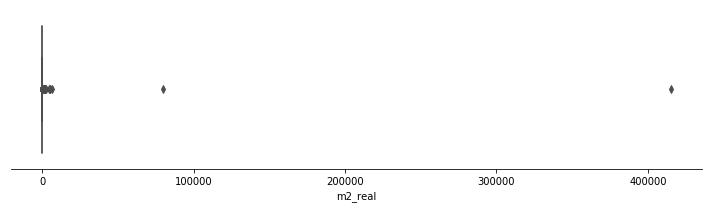

In [52]:
f, axes = plt.subplots(1, 1, figsize=(10, 3), sharex=True)
sns.despine(left=True)

(df
 .loc[:,'m2_real']
 .dropna()
 .pipe(sns.boxplot, color=clr['pr'], boxprops=dict(alpha=.7)))

plt.setp(axes, yticks=[])
plt.tight_layout()

Observamos que hay 2 casos muy extremos. Los exploramos a fin de determinar cómo tratarlos:

In [53]:
df.query('m2_real > 50000').style.set_properties(subset=['ad_description'], **{'min-width': '800px'})

,house_id,ad_description,price,bath_num,condition,construct_date,energetic_certif,floor,ground_size,heating,house_type,m2_real,m2_useful,orientation,room_num,air_conditioner,balcony,built_in_wardrobe,chimney,garage,garden,lift,reduced_mobility,storage_room,swimming_pool,terrace,loc_zone,loc_city,pop_total,pop_0-19,pop_20-64,pop_>=65,pop_foreign,rent,indoor,floor_count,location
15587,82667064,"Se vende magnífica casa individual de tres plantas en la zona de Unbemendi, Laukiz. La casa dispone de 2.037 metros cuadrados de terreno y 415 metros cuadrados de vivienda incluyendo el txoko. Consta de ocho habitaciones amplias, dos salones comedor muy amplios y luminosos, siete baños, una cocina comedor, tres terrazas y un garaje con capacidad para tres o cuatro coches. Dispone de tres chimeneas, un txoko de 300m2 y un trastero.,Para más información no dudes en ponerte en contacto con nosotros.",720000,6,para reformar,nan,en trámite,nan,2037,nan,Casa o chalet,415000,nan,"norte, sur, este, oeste",8,False,False,True,False,0,True,nan,True,True,True,True,Uribe-Butroe (BIZ),Laukiz,1191,24,57,19,6.5,31275,False,3,Laukiz
18436,39173329,"Vendemos un bonito y típico caserío vasco de 300 metros cuadrados de superficie situado en un entorno idílico en pleno corazón de Gipuzkoa, y 80.000 metros cuadrados de terreno. El caserío tiene tres plantas y dispone de 4 habitaciones, amplio salón comedor, cocina, baño. Amueblado. También dispone de garaje amplio y trastero. Tiene unas excelentes vistas y está muy bien comunicado.",425000,1,para reformar,nan,nan,nan,80000,nan,Casa rural,80000,nan,nan,4,False,False,False,False,0,True,nan,False,True,False,True,Tolosaldea (GIP),Baliarrain,137,31,56,13,6.7,21982,False,3,Baliarrain


En la descripción del anuncio se ve que en un caso han sumado 3 ceros de más a la superficie real, y en el otro, han asignado el valor de la párcela. Por lo tanto, dado que en la descripción se detalla el tamaño real, se corrigen manualmente, y se vuelve a representar el boxplot:

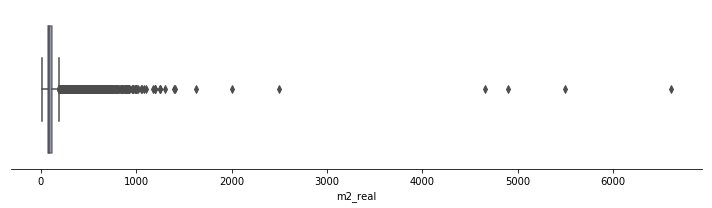

In [54]:
df['m2_real'][df.house_id == 82667064] = 415
df['m2_real'][df.house_id == 39173329] = 300

f, axes = plt.subplots(1, 1, figsize=(10, 3), sharex=True)
sns.despine(left=True)

(df
 .loc[:,'m2_real']
 .dropna()
 .pipe(sns.boxplot, color=clr['pr'], boxprops=dict(alpha=.7)))

plt.setp(axes, yticks=[])
plt.tight_layout()

Pese a haber resuelto los casos más extremos, vemos que aún siguen existiendo valores muy alejados del resto. De modo que volvemos a analizarlos a fin de determinar qué tratamiento darles:

In [55]:
out_m2 = len(df[df['m2_real'] >1500])
(df
 .query('m2_real > 1500')
 .sort_values('m2_real',ascending=False)
 .head(5)
 .style.set_properties(subset=['ad_description'], **{'min-width': '1000px'})
)

,house_id,ad_description,price,bath_num,condition,construct_date,energetic_certif,floor,ground_size,heating,house_type,m2_real,m2_useful,orientation,room_num,air_conditioner,balcony,built_in_wardrobe,chimney,garage,garden,lift,reduced_mobility,storage_room,swimming_pool,terrace,loc_zone,loc_city,pop_total,pop_0-19,pop_20-64,pop_>=65,pop_foreign,rent,indoor,floor_count,location
20725,82012713,"Obra nueva en lezo ático duplex, cocina equipada, salón, 3 habitaciones y 2 baños. Dispone de gran balcón corrido y lavadero-tendedero más 3 balcones. Todo exterior. Garaje opcional en el mismo edificio. Sin comisión de inmobiliaria.",280000,2,nan,2018,no indicado,4ª,nan,individual: gas natural,Dúplex,6605,87,"este, oeste",3,False,True,False,False,nan,False,1,True,False,False,True,Donostialdea (GIP),Lezo,6045,19,64,17,5.6,18427,False,1,Lezo
12437,39987420,"CONVENTO de SANTA CLARA (CLARISAS) DESDE EL AÑO 1469 SITUADO EN ORDUÑA.,Tiene 5.500 m2 distribuidos en 3 plantas.,-En la planta baja se encuentra la iglesia, el claustro, la sacristía, la cocina, comedores, etc.,-En la primera planta se encuentran las habitaciones, locutorios, salas de labor, botica, biblioteca, etc. ,-La planta bajo cubierta se encuentra diáfana.,Tiene 24.000 metros de terreno. Este convento tenia anexo una hermosa huera de unas dos hectáreas, rodeada toda ella de una gruesa tapia de unos 3 mts. de altura. En dicha zona existen 2-3 manantiales de agua potable cuyo caudal es muy abundante. ,Imprescindible verlo. Consúltenos.",2400000,7,nan,nan,no indicado,nan,nan,individual: gas propano/butano,Casa o chalet,5500,nan,nan,10,False,False,False,False,nan,False,nan,False,False,False,False,Arratia-Nervión (BIZ),Urduña/Orduña,4180,20,59,21,8.2,18107,nan,nan,Urduña/Orduña
7385,85178086,"Erandio junto al Makro, Nave industrial a la venta, situada en el municipio de Erandio (Bizkaia), concreta mente en Asua, la entrada al corredor del Txorierri. con acceso directo al Puente de Rontegui y la A-8. Superficie total: 4.900 m2. Altura máxima: 4,30 m. Sobrecarga entreplanta: 1.500 Kg/m2. Excelente localización y ubicación estratégica. Buena construcción y reformas importantes recientes en los edificios.",3000000,2,nan,nan,no indicado,nan,nan,nan,Piso,4900,nan,nan,3,False,False,False,False,nan,False,nan,False,False,False,False,Gran Bilbao (BIZ),Erandio,24222,18,61,21,9.8,16001,nan,nan,Erandio
6854,39733981,"! EXCELENTE OPORTUNIDAD!, , Si quieres vivir en un piso reformado, cerca de colegios, parada de bus a 50 metros y a 5 minutos del Hospital de Cruces, esta es tú casa., , Nos encontramos con una vivienda semi exterior que consta de dos habitaciones, salón, un baño y cocina. La calefacción y el agua caliente son eléctricas de bajo consumo, tiene una iluminación increíble principalmente en el salón y la cocina. Todos los armarios de la vivienda son empotrados, el suelo, ventanas y puertas recién reformados. En un edificio de hormigón., , ¡PARA ENTRAR A VIVIR!, ,Visita nuestra página Web:.",150000,1,buen estado,nan,en trámite,2ª,nan,nan,Piso,4653,46,"sur, este",2,False,False,False,False,nan,False,0,False,False,False,False,Gran Bilbao (BIZ),Barakaldo,100435,17,60,23,9,16935,False,1,Cruces (Bara)
19740,81926009,"Se vende edificio destinado antiguamente a camping en Itziar Deba. Se sitúa al lado de la carretera general que une Deba e Itziar.,El edificio ocupa una superficie construida de 618,61 metros cuadrados.,Consta de planta semisótano, planta baja, planta primera y planta bajo cubierta.,Interesante para diversos usos, residencia de la tercera edad, apartamentos turísticos...",800000,1,para reformar,nan,en trámite,nan,10000,nan,Finca rústica,2500,2000,nan,1,False,False,False,False,nan,True,nan,False,False,False,False,Bajo Deba (GIP),Deba,5457,19,59,22,7.8,22065,nan,nan,Deba


Observamos que hay {{out_m2}} viviendas con precios superiores a los 1.500 $m^2$ reales, entre las cuales hay un convento, un camping, una nave industrial... este tipo de edificios quedan fuera de nuestro objeto de estudio y podrían generar distorsión, por lo que se eliminan. Por otro lado, encontramos nuevamente viviendas que tienen mal definida su superficie; éstas las corregimos de forma manual mediante la información contenida en otros campos:

In [56]:
df['m2_real'][df.house_id == 82012713] = 90
df['m2_real'][df.house_id == 39733981] = 46

h_num = len(df[df.m2_real > 1500])
df = df[df.m2_real < 1500]
print(f'Se han descartado {h_num} viviendas')

Se han descartado 5 viviendas


Por otro lado, en el otro extremo, exploramos si hay viviendas con valores de superficie nulos o negativos: 

In [57]:
cnt = len(df.query('m2_real < 1'))
print(f"Hay {cnt} viviendas con superficie nula o negativa")

Hay 0 viviendas con superficie nula o negativa


Una vez hemos gestionado los valores extremos de la variable <font color=#5F66A1>__m2_real__</font>, hacemos lo propio con <font color=#5F66A1>__m2_useful__</font>:

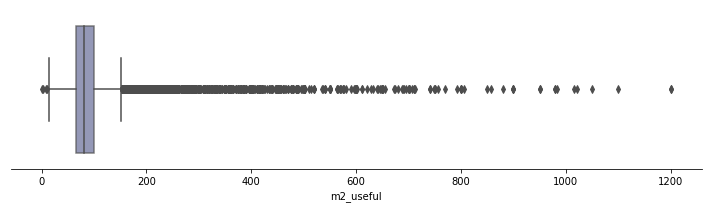

In [58]:
f, axes = plt.subplots(1, 1, figsize=(10, 3), sharex=True)
sns.despine(left=True)

(df
 .loc[:,'m2_useful']
 .dropna()
 .pipe(sns.boxplot, color=clr['pr'], boxprops=dict(alpha=.7)))

plt.setp(axes, yticks=[])
plt.tight_layout()

Vemos que el valor más extremo se encuentra en los 1.200 $m^2$, lo cual entra dentro del rango plausible tras haber eliminado las casas con más de 1.500 $m^2$ reales, por lo que en este caso, no se realiza ninguna acción más, y se procede a verificar que no haya valores nulos o negativos:

In [59]:
cnt = len(df.query('m2_useful < 1'))
print(f"Hay {cnt} viviendas con superficie nulas o negativa")

Hay 0 viviendas con superficie nulas o negativa


Por último, los metros útiles de una vivienda han de ser inferiores a sus metros reales. Verificamos si hay algún caso que no cumpla este criterio:

In [60]:
cnt = len(df.query('m2_real < m2_useful'))
print(f"Hay {cnt} viviendas con incongruencias entre las superficies")

Hay 0 viviendas con incongruencias entre las superficies


Además, por lo general, los metros útiles se situan en torno a un 0%-20% por debajo de los metros reales. Por ello, exploremos gráficamente esta relación para hallar valores extremos:

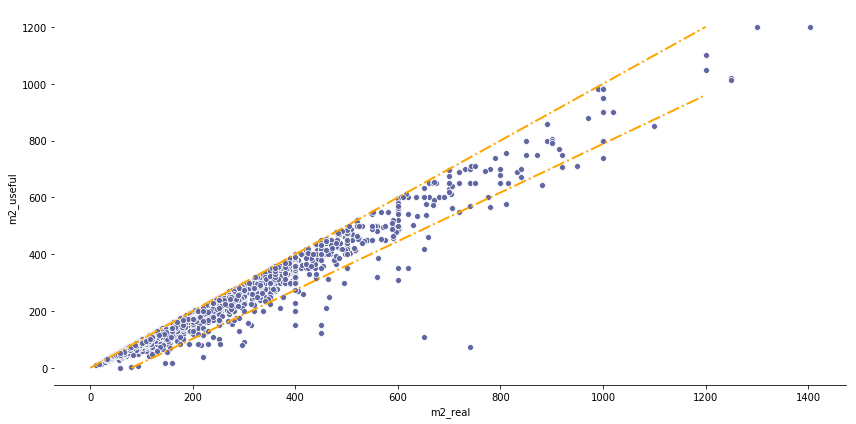

In [61]:
f, axes = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.despine(left=True)

(df
 .pipe((sns.scatterplot, 'data'),x="m2_real", y="m2_useful", color=clr['pr'], legend="full")
)

plt.plot([0,1200], [0, 1200], '-.', color='orange', linewidth = 2)
plt.plot([80,1200], [0, 960], '-.', color='orange', linewidth = 2)
plt.tight_layout()

Comprobamos que, en efecto, la mayoría de viviendas tienen una relación esperada entre metros de construcción y metros útiles. No obstante, encontramos algunas viviendas con muy pocos metros útiles para los metros reales que tienen. En concreto, encontramos 2 muy alejadas. Para cotejar si son plausibles, las exploremos más a fondo:

In [62]:
df['m2_relation'] = df['m2_real'] - df['m2_useful']

(df
 .sort_values('m2_relation', ascending=False)[:2]
 .style.set_properties(subset=['ad_description'], **{'min-width': '1400px'})
)

,house_id,ad_description,price,bath_num,condition,construct_date,energetic_certif,floor,ground_size,heating,house_type,m2_real,m2_useful,orientation,room_num,air_conditioner,balcony,built_in_wardrobe,chimney,garage,garden,lift,reduced_mobility,storage_room,swimming_pool,terrace,loc_zone,loc_city,pop_total,pop_0-19,pop_20-64,pop_>=65,pop_foreign,rent,indoor,floor_count,location,m2_relation
20097,85089573,"Ideal para los que buscan la máxima comodidad., , Apartamento de dos habitaciones en edificio de 15 años y ubicación inmejorable: junto a la Plaza Grande y Leku-Eder., , La vivienda está aprovechada al máximo. El hall ubicado en el centro de la vivienda, separa, por un lado, las zonas comunes (cocina y salón) que se conectan en un espacio diáfano con vistas a Aita Agirre Plaza, que tiene orientación sur por lo que entra mucha luminosidad. Al otro lado del hall, encontramos el baño completo con bañera y las dos habitaciones que dan a San Bartolomé, una de ellas con balcón. , , Características:, - Edificio de hormigón, - Tanto las ventanas como las puertas son de madera barnizada y las ventanas tienen además doble acristalamiento. , - Caldera individual de gas natural y radiadores de aluminio en todas las estancias., - Acceso desde Aita Agirre Plaza, sin barreras arquitectónicas., , , ,CEE en trámite.",188000,1,buen estado,nan,en trámite,2ª,nan,nan,Piso,740,74,nan,2,False,False,False,False,nan,False,1,False,False,False,True,Bajo Deba (GIP),Elgoibar,11582,20,58,22,10.2,21714,False,1,Elgoibar,666
17787,84234935,"CASA EN UNA PLANTA EN PARCELA DE 650 m2, de reciente construcción en la zona de andara mari. Consta de salón-comedor, cocina americana y salida a amplio porche, 3 habitaciones y 2 baños ( 1 incorporado en la habitación principal)., , Posibilidad de ampliar la vivienda., , En perfecto estado., ,Plentzia es un municipio de Bizkaia, ubicado en la margen derecha del último meandro de su ría, justo antes de su desembocadura en la bahía de Plencia. Se encuentra a unos 25 kilómetros al norte de Bilbao. Plentzia está muy bien comunicado ya que es la última parada de la estación Línea 1 del Metro Bilbao, por carretera el acceso se realiza por la carretera BI-2122 desde Sopelana o la BI-2120 desde Mungia y también la línea A3451 de Bizkaibus que tiene el recorrido: Las Arenas/Areeta - Armintza.",455000,2,buen estado,nan,en trámite,nan,nan,nan,Casa o chalet,650,110,nan,3,False,False,False,False,nan,False,nan,False,False,False,False,Uribe-Butroe (BIZ),Plentzia,4363,20,63,17,9.3,22374,nan,nan,Plentzia,540


Vemos que en el primer caso, se ha asigando un 0 de menos a la variable de metros útiles, y en el segundo, se han asignado los metros de la parcela a la variable de metros reales. Por lo tanto, se corrigen:

In [63]:
df = df.drop(columns='m2_relation')
df['m2_useful'][df.house_id == 85089573] = 740
df['m2_real'][df.house_id == 84234935] = 130

### <font color=#5F66A1>ground_size</font>

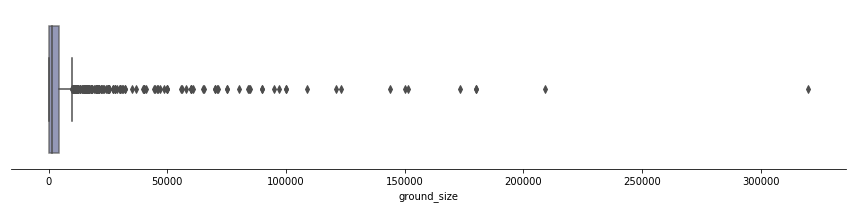

In [64]:
f, axes = plt.subplots(1, 1, figsize=(12, 3), sharex=True)
sns.despine(left=True)

(df
 .loc[:,'ground_size']
 .pipe(sns.boxplot, color=clr['pr'], boxprops=dict(alpha=.7)))

plt.setp(axes, yticks=[])
plt.tight_layout()

Se observa como hay valores muy extremos, con uno especialmente alejado del resto. Analizamos los más extremos:

In [65]:
(df.query('ground_size > 160000')
 .style.set_properties(subset=['ad_description'], **{'min-width': '1600px'}))

,house_id,ad_description,price,bath_num,condition,construct_date,energetic_certif,floor,ground_size,heating,house_type,m2_real,m2_useful,orientation,room_num,air_conditioner,balcony,built_in_wardrobe,chimney,garage,garden,lift,reduced_mobility,storage_room,swimming_pool,terrace,loc_zone,loc_city,pop_total,pop_0-19,pop_20-64,pop_>=65,pop_foreign,rent,indoor,floor_count,location
518,34130148,Se vende caserío antiguo de dos viviendas de unos 450 m2 en Amoroto (Bizkaia) con 32 hectáreas de plantación de pino de 28 años y eucalipto. Todo el terreno en una única finca. Cerca de Lekeitio.,550000,1,para reformar,nan,no indicado,nan,320000,nan,Casa rural,450,440,sur,6,False,False,False,False,nan,False,nan,False,False,False,False,Lea-Artibai (BIZ),Amoroto,419,20,59,21,6.7,19570,False,3,Amoroto
17685,26435818,caserio señoria del año 1444 de 700m2 + borda y 180.000 m2 de terreno. Espectacular estructura de madera. Tejado a cuatro aguas. Todo a reformar. Licencia para dos viviendas y posibilidad de negocio.,730000,1,para reformar,nan,nan,nan,180000,nan,Finca rústica,700,695,"sur, este",2,False,False,False,True,0,True,nan,False,True,False,False,Duranguesado (BIZ),Elorrio,7336,19,59,22,6.9,21003,False,3,Elorrio
18512,36709763,"Caserio ubicado en la localidad de Aia (GIPUZKOA), en el interior del parque natural de Pagoeta.,Consta de tres plantas, BAJA (totalmente reformada ), 1ª PLANTA, diáfana y 2ª PLANTA.,Calefacción con chimenea de leña.",378000,1,buen estado,nan,en trámite,nan,180000,nan,Casa rural,400,350,"norte, sur, este, oeste",2,False,False,False,True,0,True,nan,False,True,False,False,Urola Kosta (GIP),Aia,2081,24,59,17,5.8,20073,False,3,Aia
19292,84912471,"Espectacular Caserío histórico de dos plantas y bajo cubierta de 391 m2 / planta.,Cuenta con 173.318 m2 de pertenecidos alrededor, con amplias praderas llanas, preciosas vistas despejadas al Txindoki, soleado y formando una única parcela.,Posibilidad de constituir dos viviendas independientes en el interior del Caserío y aumentar un 20 & el actual volumen edificado. Acceso rodado, suministro eléctrico y agua.,A reformar totalmente, aunque la estructura esta muy bien. Arbolado pinar valorado en aproximadamente 70.000 euros. Muchas posibilidades. OCASION.",480000,1,para reformar,nan,en trámite,nan,173318,nan,Finca rústica,1170,nan,nan,5,False,False,False,False,nan,False,nan,False,False,False,False,Goierri (GIP),Gaintza,129,18,58,24,4.2,20694,False,3,Gaintza
24688,38761501,"ETXiAN Inmobiliaria. - Baserria GARIBAI auzoan (Oñati), lur sail askorekin (+200.000m2),Baserri ERDIA saltzen da (eraikinaren ezkerreko aldea), guztira 3 solairu eraikiak + Baserri parean dagoen 100m2-ko TXABOLA bat.,- Oso argitsua da eta ikuspegi zoragarriak ditu inguruko baso eta mendietara.,- Asfaltaturiko bidea dago baserriraino, eta bertatik gertu Ermita eta eraberritua dagoen beste baserri bat aurkitu dezakegu.,- Etxea eusten duten paretak eta haritzezko zutoinak egoera onean daude, teilatua Ondulinerekin babestua dago, eta harrizko labe bat ere badu.,-LUR SAILAK: 11 Lur sail ditu jabetzan, guztira 2.000 area baiño gehigo batzen dituztenak ( 208.970m2 ), etxe ondoan dauden hortuak barne.,- Etxeraino heltzen den iturburu propioa dauka.,*Eskeintzen den etxebizitzak eraikinaren ezkerreko aldea betetzen du, argazkietan ikusgai.,(CAS. ) CASERIO EN GARIBAI AUZOA (OÑATI), con una importante extensión en terrenos pertenecidos: ( MAS DE 200.000m2 ) ,La vivienda ofrecida ocupa la MITAD IZQUIERDA DEL EDIFICIO*, con un total de tres plantas construidas + una chabola de 100m2 junto a la entrada.,- Cuenta con mucha luz natural y espectaculares vistas. ,- Acceso por carretera asfaltada; En los alrededores se encuentra la Hermita del Sagrado Corazón y otro caserío recientemente rehabilitado. ,- Las paredes maestras y vigas de roble se encuentran en perfecto estado, tejado protegido con Onduline en toda su superficie, horno de piedra.. . ,- TERRENOS: La propiedad cuenta con 11 terrenos que suman mas de 2000 áreas (208.970 me

Vemos que, en principio, los valores son plausibles, por lo que no efectuamos ninguna tarea al respecto. Por otro lado, verificamos que no hay parcelas con valores negativos:

In [66]:
cnt = len(df.query('ground_size < 0'))
print(f"Hay {cnt} viviendas con parcela nula o negativa")

Hay 0 viviendas con parcela nula o negativa


### <font color=#5F66A1>price</font>

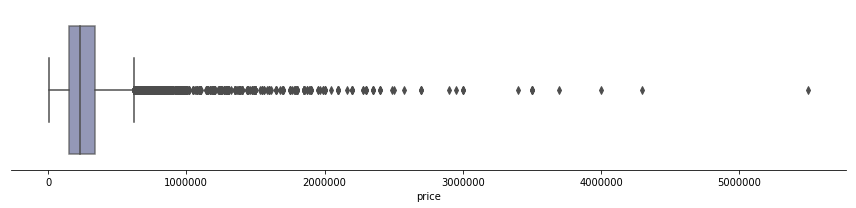

In [67]:
f, axes = plt.subplots(1, 1, figsize=(12, 3), sharex=True)
sns.despine(left=True)

(df
 .loc[:,'price']
 .pipe(sns.boxplot, color=clr['pr'], boxprops=dict(alpha=.7)))

plt.setp(axes, yticks=[])
plt.tight_layout()

Vemos que la vivienda más cara de nuestro conjunto de datos está por encima de los 5 millones de euros. Si bien es muy cara, es plausible que nos encontremos con alguna de tal precio. Aún así, exploramos las viviendas con precios más elevados a fin de cotejar que los datos son correctos:

In [68]:
(df
 .query('price > 3500000')
 .sort_values('price', ascending=False)
 .style.set_properties(subset=['ad_description'], **{'min-width': '2400px'})
)

,house_id,ad_description,price,bath_num,condition,construct_date,energetic_certif,floor,ground_size,heating,house_type,m2_real,m2_useful,orientation,room_num,air_conditioner,balcony,built_in_wardrobe,chimney,garage,garden,lift,reduced_mobility,storage_room,swimming_pool,terrace,loc_zone,loc_city,pop_total,pop_0-19,pop_20-64,pop_>=65,pop_foreign,rent,indoor,floor_count,location
15649,82667411,"Magnífica vivienda de 320 metros cuadrados con 2.000 metros de terreno con árboles frutales. La casa dispone de cuatro habitaciones amplias, cocina equipada, dos salones con comedor uno con una chimenea, cuatro servicios más un aseo, dos balcones; dos terrazas y un txoko de 40m2. Además la vivienda tiene calefacción de propano, suelos de parquet, piscina, pistas de padel y tennis; supermercado y polideportivo en la urbanización.,Para más información no dudes en ponerte en contacto con nosotros.",5499000,5,buen estado,nan,en trámite,nan,2000,nan,Casa o chalet,320,nan,"norte, sur, este",4,False,True,True,False,0,True,nan,False,True,True,True,Uribe-Butroe (BIZ),Laukiz,1191,24,57,19,6.5,31275,False,3,Laukiz
22220,37696785,"Se trata de una de las pocas villas unifamiliar en la zona de Ondarreta. Está a dos minutos a pie de la playa y de todos los servicios. Nada más cruzar el portón nos encontramos con bonito jardín y un porche que da acceso a la vivienda. Al entrar en la villa está un amplio hall recibidor del cual podemos acceder a las diferentes estancias de la planta baja como el salón principal que cuenta con grandes ventanales y una bonita chimenea. En la misma planta tenemos un despacho, un comedor de grandes dimensiones, otro salón mas informal, una cocina totalmente equipada y un aseo de cortesía. Ya en la primera planta, nos encontramos con la habitación principal que cuenta con gran vestidor y baño y bañera y ducha, desde el mirador se tiene vistas laterales al mar. Otra esplendida habitación con su propio baño, esta cuenta con una espaciosa terraza con vistas a las villas de alrededor y lateralmente a los jardines de Ondarreta y la playa. Otra habitación más, un baño comunicado con el lavadero y una pequeña y acogedora sala de estar. En la planta segunda 8 habitaciones ahora más y un baño. En la planta sótano se encuentran diferentes estancias como la sala de calderas, trastero, bodega y un baño completo. A un costado de la villa se encuentra el garaje de gran tamaño que puede albergar hasta dos choches y varias motos. Aunque la villa data de los años 40, ha sido una propiedad que se ha mantenido en muy buen estado y ha sufrido reformas para adecuar la vivienda adecuándose a los tiempos y a las necesidades de cada momento. Los materiales con los que se construyó y que se han mantenido hasta hoy en día son de gran calidad.,La zona de Ondarreta es un los distritos más representativos del Barrio del Antiguo. El barrio del Antiguo es uno de los 17 barrios en los que se divide la ciudad de San Sebastian. Esta zona va desde el Túnel del Antiguo hasta el Peine del Viento y engloba el área entre la línea de costa y la ciudad edificada. Algunas de las edificaciones y lugares más representativas de la ciudad se encuentran en esta zona, como son el Palacio Mirar y sus jardines, que fue construido entre 1.889 y 1.893 de estilo inglés. Fue residencia de verano de la Reina Regente María Cristina y propiedad de la Familia Real española hasta 1.972. A pocos metros del palacio se encuentran los Jardines de Ondarreta. El Real Club de Tenis, que se encuentra entre los Jardines y la Plaza del Peine del Viento, conjunto escultórico de Eduardo Chillida. La zona más cercana a la playa de Ondarreta, donde se encuentra la villa, constituye una de las zonas más exclusivas de la ciudad, donde se encuentran villas y palacetes de alto valor arquitectónico, que abarca desde villas de estilo Racionalista de arquitectos como Eduardo Lagarde, hasta villas de puro estilo vasco. Muy cerca de esta zona se encuentra una de las calles más animadas de este distrito, Cal

Vemos que los precios parecen correctos, por lo que no realizamos ninguna acción al respecto. Por otro lado, verificamos si hay viviendas con precios excesivamente bajos:

In [69]:
(df
 .query('price < 20000')
 .style.set_properties(subset=['ad_description'], **{'min-width': '600px'})
)

,house_id,ad_description,price,bath_num,condition,construct_date,energetic_certif,floor,ground_size,heating,house_type,m2_real,m2_useful,orientation,room_num,air_conditioner,balcony,built_in_wardrobe,chimney,garage,garden,lift,reduced_mobility,storage_room,swimming_pool,terrace,loc_zone,loc_city,pop_total,pop_0-19,pop_20-64,pop_>=65,pop_foreign,rent,indoor,floor_count,location
170,37173449,"Aprovecha esta oportunidad única. Vivienda con descuento de hasta el 50% ya aplicado en el precio. Casa derruida en parcela de 112,64 m2. Posibilidad de edificar una vivienda de 173,40 m2 útiles, distribuidos en planta baja y primera.",4400,2,nan,nan,no indicado,nan,nan,nan,Casa o chalet,216,80,nan,3,False,False,False,False,nan,False,nan,False,False,False,False,Encartaciones (BIZ),Karrantza Harana/Valle de Carranza,2715,14,59,28,4.6,13431,nan,nan,Karrantza Harana/Valle de Carranza
7503,83053793,Es un sótano tiene una ventana y un inodoro.,16000,1,para reformar,nan,no indicado,<0ª,nan,nan,Piso,28,25,nan,0,False,False,False,False,nan,False,0,False,False,False,False,Gran Bilbao (BIZ),Sestao,27445,16,59,25,8.7,15057,True,1,Txabarri - La Unión - Vista Alegre (Sest)
17841,81380290,"Se vende CASA muy en RUINAS, sobre un terreno propio de 300 m2; en el Barrio de VISTA ALEGRE, encima del Área Recreativa del Bº de LA ACEÑA, (GALDAMES). El acceso rodado no llega hasta la casa.",7200,0,para reformar,nan,no indicado,nan,nan,nan,Finca rústica,98,nan,sur,0,False,False,False,False,nan,False,nan,False,False,False,False,Encartaciones (BIZ),Galdames,829,17,60,24,4.1,19103,nan,nan,Galdames
18933,34465455,"Piso distribuido en salón-comedor, cocina, 4 habitaciones, 1 baño y 1 aseo. Dispone de trastero ubicado en la cubierta del edificio. Está situado en una zona residencial, junto a una de las vías principales de la localidad.",15500,2,nan,nan,no indicado,2ª,nan,nan,Piso,92,74,nan,4,False,False,False,False,nan,False,0,False,True,False,False,Goierri (GIP),Zumarraga,9834,18,57,24,7.8,20472,False,1,Zumarraga


Vemos que las viviendas tienen bien asignado el precio, por lo que optamos por no descartarlos, entendiendo que forman parte también del conjunto de datos de casas en venta que queremos estudiar.

### <font color=#5F66A1>bath_num</font>

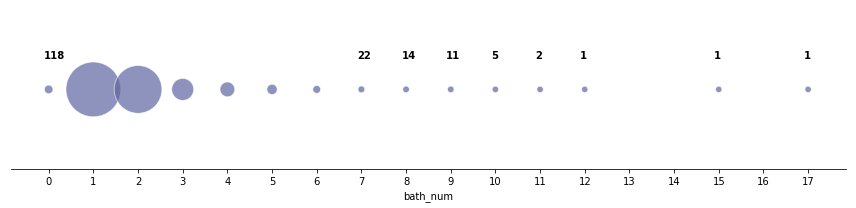

In [70]:
f, ax = plt.subplots(1, 1, figsize=(12, 3), sharex=True)
sns.despine(left=True)

def print_text(nums):  
    for num in nums:
        cnt = len(df.query('bath_num == @num'))
        plt.text(num-0.1, 1.008, cnt, size='medium', weight='semibold')

(df
 .groupby('bath_num')
 .count()
 .reset_index()
 .pipe((sns.scatterplot, 'data'), x='bath_num', y=1, size='house_id', sizes=(40, 3000)
       , color=clr['pr'], alpha=.7, legend=False))

ax.set_xticks(range(0,18))
print_text([0,7,8,9,10,11,12,15,17])

plt.setp(ax, yticks=[])
plt.tight_layout()

Vemos que hay unas pocas viviendas con un número muy elevado de baños. Las exploramos:

In [71]:
(df
 .query('bath_num > 10')
 .sort_values('bath_num', ascending=False)
 .style.set_properties(subset=['ad_description'], **{'min-width': '1600px'})
)

,house_id,ad_description,price,bath_num,condition,construct_date,energetic_certif,floor,ground_size,heating,house_type,m2_real,m2_useful,orientation,room_num,air_conditioner,balcony,built_in_wardrobe,chimney,garage,garden,lift,reduced_mobility,storage_room,swimming_pool,terrace,loc_zone,loc_city,pop_total,pop_0-19,pop_20-64,pop_>=65,pop_foreign,rent,indoor,floor_count,location
245,37455487,"Se vende hotel con encanto en pleno funcionamiento, y parcela de 12. 500 m2 por no poder atender. construido en el año 2005 y abierto al público en 2006, está situado en el barrio de ahedo del valle de carranza, lugar mágico, con vistas espectaculares. hotel en pleno funcionamiento, con 8 habitaciones temáticas distintas con bañera de hidromasaje en todas, 2 grandes suites acabadas sin inaugurar, vivienda de los propietarios, y salas para reuniones y celebraciones. espacio exterior parapoder construir una piscina. con todos los permisos legales vigentes. para poder explotarlo inmediatamente, está abierto y a pleno rendimiento. Buenas valoraciones en Booking. com, TripAdvisor, Google, etc. solo para compradores directos interesados. intermediarios sólo con resultado final de venta.",950000,17,buen estado,2006,no indicado,nan,12500,nan,Casa rural,1000,984,este,12,True,True,True,True,0,True,nan,True,True,False,True,Encartaciones (BIZ),Karrantza Harana/Valle de Carranza,2715,14,59,28,4.6,13431,False,3,Karrantza Harana/Valle de Carranza
18074,33257536,"Se trata de un edificio exento en el centro de Legazpia (Guipúzcoa) con claras reminiscencias de lo que se ha venido denominando “regionalismo” o “arquitectura neovasca”. Presenta dos pisos, ganbara y semisótano de fábrica de mampuesto y ladrillo visto. En el sótano se encuentra una sala de reuniones, dos baños, la lavandería y zona de almacenaje. En la planta noble se encuentra el comedor principal, hall, y zona de bar. Desde esta planta y desde las diferentes estancias se puede acceder a las diferentes terrazas de las que dispone la propiedad. En la primera y se encuentran seis habitaciones, todas ellas con baño, en esta planta se encuentra también un office. La segunda planta también hay otras 6 habitaciones con baño y un office. La torre del edificio alberga una suite con baño y zona de despacho. Los materiales empleados en la construcción son de muy buena calidad y cabe destacar la espectacular escalera.,Situado al sur de Gipuzkoa, el municipio de Legazpi pertenece a la comarca de Urola Kosta. El río Urola atraviesa la localidad y el monte Aizkorri (1.528 m) se abre paso en los alrededores. Prácticamente en el centro de las tres capitales vascas, Bilbao 75 km, de San Sebastián 64 km y de Vitoria 55 km. Legazpi es un municipio íntimamente ligado a la transformación del hierro, favorecida por la riqueza forestal y la actividad minera de la zona. En este sentido, el visitante que llega al municipio tiene la oportunidad de conocer más a fondo todos los detalles de este oficio en el museo del hierro y en la ferrería de Mirandaola, ubicado en un hermoso paraje en las faldas del Parque Natural de Aizkorri. En un espacio único, una antigua fábrica reconvertida en Museo muestra la relación entre el arte y la industria de la mano de uno de los escultores más famosos del País Vasco, Eduardo Chillida, quien vino a Legazpi- El Valle del Hierro a realizar sus esculturas monumentales que hoy están en plazas y museos de todo el mundo. En este espacio se muestran los talleres de papel y de forja del escultor, las máquinas de la Gran Forja, modernos sistemas audiovisuales y entrevistas a los trabajadores. Nos llamarán la atención los edificios que se alzan en el casco urbano, ya que predominan las construcciones modernas. Cabe destacar el propio ayuntamiento de Legazpi, que cuenta con una fachada sillar y un bonito escudo de hierro. Próximo a él se encuentra la hermosa iglesia parroquial de Nuestra Señora de la Asunción, del siglo XIV, así como el palacio Bikuña, obra del siglo XVI. Todo ello, junto a los nume

Vemos que se tratan de hoteles, por lo que optamos por descartarlos del conjunto de datos por no ajustarse a nuestro objeto de estudio:

In [72]:
del_count = len(df[df.bath_num > 10])
df = df[df.bath_num < 11]
print(f"Se han eliminado {del_count} viviendas")

Se han eliminado 5 viviendas


Por último, vemos que hay bastantes viviendas sin baños. Exploramos para entender a que se debe:

In [73]:
(df
 .query('bath_num == 0')
 .sort_values('bath_num', ascending=False)[:5]
 .style.set_properties(subset=['ad_description'], **{'min-width': '1600px'})
)

,house_id,ad_description,price,bath_num,condition,construct_date,energetic_certif,floor,ground_size,heating,house_type,m2_real,m2_useful,orientation,room_num,air_conditioner,balcony,built_in_wardrobe,chimney,garage,garden,lift,reduced_mobility,storage_room,swimming_pool,terrace,loc_zone,loc_city,pop_total,pop_0-19,pop_20-64,pop_>=65,pop_foreign,rent,indoor,floor_count,location
4,81969902,Manzaneda de Biañez. Casa rural para reformar totalmente. 3 plantas de 133 m2 cada una de ellas. Medidas aproximadas exteriores 16x8m.,60000,0,para reformar,nan,no indicado,nan,nan,nan,Casa o chalet,400,nan,nan,0,False,False,False,False,nan,False,nan,False,False,False,False,Encartaciones (BIZ),Karrantza Harana/Valle de Carranza,2715,14,59,28,4.6,13431,False,3,Karrantza Harana/Valle de Carranza
12344,85194152,"2 plantas. 99m2 por planta.,14.200m2 de terreno.,Buen acceso.,A reformar.",99000,0,para reformar,nan,en trámite,nan,14245,no dispone de calefacción,Finca rústica,198,nan,nan,1,False,False,False,False,nan,False,nan,False,False,False,False,Arratia-Nervión (BIZ),Lemoa,3521,20,63,17,8.7,19045,nan,nan,Lemoa
15393,84633342,"Caserío bifamiliar ubicado en un entorno privilegiado, a 2 minutos del centro de Mungia en coche o andando por el bidegorri.,Con una superficie de 450 metros y situado en una parcela de 7.200 totalmente cerrados con muro de hormigón, vigas y malla.,A rehabilitar completamente! Buenos accesos y entorno.,CEE/CAPV/2017/00100XXX E,Si desea recibir más información o concertar una visita para este inmueble, por favor contacte con nosotros. ¡Estaremos encantados de atenderle!,Le recordamos también que puede encontrar este y muchos más inmuebles en nuestra página web!,Bi bizitzako baserria Mungiatik bi minutura, kotxez zein bidegorritik oinez joateko aukera.,Etxebizitzak 450 metro dauzka eta 7.200 metroko lursail itxia, hormigoizko horma bitartez. Guztiz birgaitu beharra dago.,CEE/CAPV/2017/00100XXX E,Informazio gehiago nahi baduzu edo etxea bisitatu nahi izanez gero, dei iezaguzu mesedez.,Erantzuteko irrikitan egongo gara! Higiezin hau eta beste asko aurki ditzakezu gure web-orrian!",450000,0,para reformar,nan,nan,nan,7200,nan,Chalet adosado,460,453,"norte, sur, este, oeste",0,False,True,False,False,0,True,nan,False,True,False,False,Uribe-Butroe (BIZ),Mungia,17554,22,62,16,10.9,22739,False,2,Mungia
15195,83930425,"Caserio a reformar en zona Mendiondo, zona tranquila, a diez minutos metro Urduliz-Larrabasterra., , Se trata de la mitad de un caserío bifamiliar., , Tiene 150 m2 cada planta, más la zona bajo tejado con muy buen aprovechamiento., ,Le corresponden 400 m2 de terreno en dos zonas, delantera y trasera de la vivienda y el uso compartido de un horno antiguo.",350000,0,para reformar,nan,en trámite,nan,nan,nan,Casa rural,314,270,nan,0,False,False,False,False,0,False,nan,False,False,False,True,Uribe-Butroe (BIZ),Urduliz,4319,21,63,16,5.8,21310,nan,nan,Urduliz
15147,38856315,Casa unifamiliar para reformar con 2.800 m2 de terreno.,661113,0,para reformar,nan,en trámite,nan,nan,nan,Casa o chalet,360,nan,nan,0,False,False,False,False,nan,False,nan,False,False,False,False,Uribe-Butroe (BIZ),Barrika,1541,20,59,21,5.2,21751,nan,nan,Barrika


Vemos que el hecho de que las viviendas no dispongan de baños se debe a que se trata de viviendas que han de reformarse, lo cual tiene sentido. Por ello, verificamos que todas las viviendas sin baños sean en efecto viviendas que han de reformarse:

In [74]:
len(df.query('bath_num == 0 & condition != "para reformar"'))

0

### <font color=#5F66A1>room_num</font>

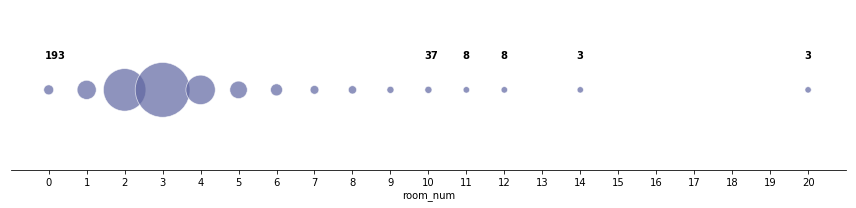

In [75]:
f, ax = plt.subplots(1, 1, figsize=(12, 3), sharex=True)
sns.despine(left=True)

def print_text(nums):  
    for num in nums:
        cnt = len(df.query('room_num == @num'))
        plt.text(num-0.1, 1.008, cnt, size='medium', weight='semibold')

(df
 .groupby('room_num')
 .count()
 .reset_index()
 .pipe((sns.scatterplot, 'data'), x='room_num', y=1, size='house_id', sizes=(40, 3000)
       , color=clr['pr'], alpha=.7, legend=False))

ax.set_xticks(range(0,21))
print_text([0, 10,11,12,14,20])

plt.setp(ax, yticks=[])
plt.tight_layout()

En este caso, se observa también que hay algunas viviendas con un gran número de habitaciones. Las exploramos:

In [76]:
(df
 .query('room_num > 12')
 .sort_values('room_num', ascending=False)
 .style.set_properties(subset=['ad_description'], **{'min-width': '1200px'})
)

,house_id,ad_description,price,bath_num,condition,construct_date,energetic_certif,floor,ground_size,heating,house_type,m2_real,m2_useful,orientation,room_num,air_conditioner,balcony,built_in_wardrobe,chimney,garage,garden,lift,reduced_mobility,storage_room,swimming_pool,terrace,loc_zone,loc_city,pop_total,pop_0-19,pop_20-64,pop_>=65,pop_foreign,rent,indoor,floor_count,location
11574,84744587,nan,180000,8,para reformar,nan,no indicado,nan,nan,nan,Casa o chalet,1000,nan,nan,20,False,False,False,False,nan,False,nan,False,False,False,False,Busturialdea (BIZ),Murueta,309,21,65,14,5.3,23879,nan,nan,Murueta
11670,26046434,"el número de portal correcto es Nagusia kalea, 31.",299000,3,para reformar,nan,no indicado,nan,50,nan,Casa rural,620,600,"norte, este, oeste",20,False,False,True,False,nan,True,nan,False,True,False,True,Busturialdea (BIZ),Elantxobe,346,9,57,34,4.2,16778,False,3,Elantxobe
17882,35771906,nan,225000,5,para reformar,nan,no indicado,nan,2697,nan,Casa rural,1080,nan,nan,20,False,False,False,False,nan,False,nan,False,False,False,False,Encartaciones (BIZ),Lanestosa,254,12,64,24,7,13489,False,3,Lanestosa
1372,85474676,"Rara oportunidad de adquirir esta joya de arquitectura vasca.,Construida por la familia Llodio en 1903 esta casa/palacete consta de 3 plantas con 7 grandes dependencias en cada una con chimeneas, escalera de apertura doble y gran hall en cada una de las plantas.,A 250 metros de la estacion de tren ( cada 15 minutos y conexiones con metro), servicios de bus y tambien proximo al aeropuerto y autovia.,Situada junto al parque tecnologico de Zamudio y Lezama con gran volumen de trabajadores y tambien cercana a un agroturismo que funciona todo el año a alto rendimiento.,Gran parcela de terreno y proyecto para adificio anexo con permiso para rehabilitar ya aprovado. La finca tiene 2 entradas, una por el este y la otra por el oeste.,Gran potencial para desarrollo como hotel dada su localizacion, capacidad para parking y conexiones de transporte o para cualquier empresa de servicios. Si no se desea usar el terreno para parking, hay extenso parking publico a 100m de la entrada.",799000,2,para reformar,nan,no indicado,nan,2500,nan,Otros,990,980,sur,14,False,True,False,True,0,True,nan,False,False,False,False,Gran Bilbao (BIZ),Lezama,2429,21,60,19,6.2,23871,False,3,Lezama
12180,81289483,Casa unifamiliar de 3 plantas. 961 m2 en total. 14 habitaciones. 8 baños. Hermosos salones con chimenea. Porches. Piscina. Frontón. Terreno de 12.500 m2 junto a la casa. Posibilidad de mas terreno. Calefacción. Parada de bus junto a la casa. Zona soleada y tranquila.,649000,8,buen estado,nan,en trámite,nan,12500,nan,Casa o chalet,961,nan,oeste,14,False,True,True,False,nan,False,nan,False,True,False,True,Arratia-Nervión (BIZ),Artea,735,20,58,23,5,22862,False,3,Artea
12519,84476689,"Chalet en venta en Artea de 735m2 construidos distribuido en tres plantas, con un parcela de 20.000m2 en las que incluye un frontón, piscina, zona con mesas en las que poder disfrutar del bonito entorno que ofrece estar en plena naturaleza.,La vivienda dispone de 14 habitaciones y 8 baños, cocina y salón con chimenea, dos porches uno totalmente acristalado para los días de invierno, salida a terraza desde el segundo piso. ,Calefacción,Situado en pleno corazón del valle de Arratia, con muy buena conexión, parada de Autobús junto a la casa. Zona soleada y tranquila en la que poder disfrutar de la naturaleza.",649000,8,para reformar,nan,en trámite,nan,20410,nan,Casa o chalet,735,nan,nan,14,False,False,True,False,nan,True,nan,False,False,True,True,Arratia-Nervión (BIZ),Artea,735,20,58,23,5,22862,nan,nan,Artea


En lo que respecta a las viviendas con 20 habitaciones, al no poder verificar si son datos correctos, se opta por eliminarlos. En el caso de las viviendas con 14 habitaciones, sin embargo, se comprueba que el numero elevado de estancias se debe a que son caserones, así que se mantienen:

In [77]:
del_count = len(df[df.room_num > 15])
df = df[df.room_num < 15]
print(f"Se han eliminado {del_count} viviendas")

Se han eliminado 3 viviendas


Finalmente, de forma análoga al estudio de la variable <font color=#5F66A1>__bath_num__</font>, se verifica que las viviendas con 0 habitaciones corresponden a casas por reformar:

In [78]:
(df
 .query('room_num == 0 & condition!="para reformar"')
 .sort_values('room_num', ascending=False)[:5]
 .style.set_properties(subset=['ad_description'], **{'min-width': '1600px'})
)

,house_id,ad_description,price,bath_num,condition,construct_date,energetic_certif,floor,ground_size,heating,house_type,m2_real,m2_useful,orientation,room_num,air_conditioner,balcony,built_in_wardrobe,chimney,garage,garden,lift,reduced_mobility,storage_room,swimming_pool,terrace,loc_zone,loc_city,pop_total,pop_0-19,pop_20-64,pop_>=65,pop_foreign,rent,indoor,floor_count,location
625,30134584,nan,190000,1,buen estado,nan,no indicado,2ª,nan,individual: gas propano/butano,Estudio,70,60,"norte, este",0,False,True,True,False,nan,False,0,False,True,False,False,Lea-Artibai (BIZ),Ondarroa,8397,16,60,24,9.8,17255,False,1,Ondarroa
21625,84933487,"Si estás buscando un despacho válido para trabajar, un txoko en Donosti, un estudio porque eres un profesional independiente o simplemente quieres tener un pied a terre, ésta es tu oportunidad. Ven a ver este agradable loft, impecable y situado en una bonita urbanización en zona residencial del barrio de Egia. Llámanos al 943 287367 y te lo enseñaremos.",89500,1,buen estado,1990,nan,<0ª,nan,no dispone de calefacción,Estudio,27,nan,nan,0,False,False,False,False,nan,False,0,False,False,False,False,Donostialdea (GIP),Donostia/San Sebastián,186665,17,59,24,10.6,24552,False,1,Egia (Dono)
21603,82244597,"Local totalmente reformado distribuido en dormitorio, salón, cocina y baño. Exterior con ventanas de doble cristal en buen estado. A un minuto andando de Gros y Centro, junto al poli deportivo Zuhaizti.",120000,1,buen estado,1895,nan,<0ª,nan,nan,Estudio,50,45,oeste,0,False,False,False,False,nan,False,0,False,False,False,False,Donostialdea (GIP),Donostia/San Sebastián,186665,17,59,24,10.6,24552,False,1,Egia (Dono)
21553,82979235,"Estudio amueblado con terraza en Donosti. Dispone de una pequeña cocina equipada y un amplio baño. Acceso directo a la terraza del inmueble.,Dispone de lavadora, frigorífico, cama nido doble y un amplio armario empotrado.,Situado en el número 64 Calle Virgen del Carmen, San Sebastian.",150000,1,buen estado,nan,no indicado,6ª,nan,nan,Estudio,20,nan,nan,0,False,False,True,False,nan,False,1,False,False,False,True,Donostialdea (GIP),Donostia/San Sebastián,186665,17,59,24,10.6,24552,False,1,Egia (Dono)
21421,82028987,"Loft sin permiso de habitabilidad en el centro de Gros con entrada directa desde calle a un pequeño portal donde se encuentran 2 Loft. Espacio diáfano de sala-comedor-cocina equipada con entrada directa más ventana a calle Corta (muy luminoso). Baño con plato de ducha y habitación independiente con gran armario. Todo Eléctrico. Suelo de tarima recién puesto. IDEAL COMO ESTUDIO, DESPACHO, SEGUNDA RESIDENCIA... VACACIONES...! URGE VENDER! AMUEBLADO! .",157000,1,buen estado,nan,nan,<0ª,nan,nan,Estudio,30,28,nan,0,False,False,False,False,nan,False,0,False,False,False,False,Donostialdea (GIP),Donostia/San Sebastián,186665,17,59,24,10.6,24552,False,1,Gros (Dono)


Vemos que hay 5 viviendas sin habitaciones que no son para reformar. Sin embargo, corresponden a estudios, lo cual también tiene sentido, así que se mantienen. 

## Ruido y outliers en variables cateógricas

### <font color=#5F66A1>floor</font>

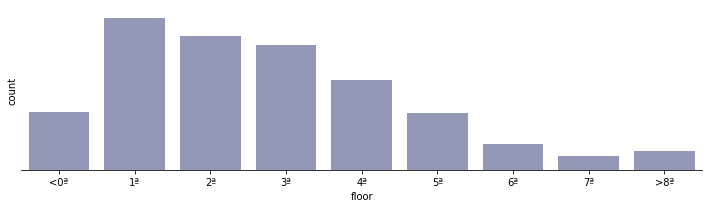

In [79]:
f, axes = plt.subplots(1, 1, figsize=(10, 3), sharex=True)
sns.despine(left=True)

(df
 .loc[:,'floor']
 .dropna()
 .pipe(sns.countplot, color=clr['pr'], alpha=0.7
       , order=['<0ª','1ª','2ª','3ª','4ª','5ª','6ª','7ª','>8ª']))

plt.setp(axes, yticks=[])
plt.tight_layout()

Vemos que la distribución de las plantas de las viviendas se ajusta a valores plausibles, por lo que las dejamos tal cual.

# Gestión de datos incompletos

En este apartado gestionaremos los valores vacíos que aún presenta el conjunto de datos.

## Estudio general de *missing values*

Empezamos analizando cómo estan repartidos nuestros *missing values*:

In [80]:
n_records = len(df)
def null_value(df):
    for column in df:
        if len(df[df[column].isnull()]) / (1.0*n_records) > 0.01:
            print("Column:{} ## Per: {}% ## Type: {}".format(
                                    df[column].name, 
                                    round((len(df[df[column].isnull()]) / (n_records)) * 100, 2), 
                                    df[column].dtype
        ))

null_value(df)

Column:ad_description ## Per: 3.38% ## Type: object
Column:condition ## Per: 8.61% ## Type: category
Column:construct_date ## Per: 68.71% ## Type: float64
Column:energetic_certif ## Per: 23.49% ## Type: category
Column:floor ## Per: 17.93% ## Type: object
Column:ground_size ## Per: 92.62% ## Type: float64
Column:heating ## Per: 61.36% ## Type: category
Column:m2_useful ## Per: 38.52% ## Type: float64
Column:orientation ## Per: 56.85% ## Type: category
Column:garage ## Per: 71.06% ## Type: float64
Column:lift ## Per: 17.15% ## Type: category
Column:indoor ## Per: 8.38% ## Type: category
Column:floor_count ## Per: 8.38% ## Type: float64


Vemos que hay muchas variables con *missing values*, algunas incluso con más del 50% de sus valores. Trataremos todas, excepto la descripción de los anuncios, ya que solo la usaremos como ayuda en la fase exploratoria.

### condition

In [81]:
df["condition"].unique()

[buen estado, para reformar, NaN, obra nueva]
Categories (3, object): [buen estado, para reformar, obra nueva]

In [82]:
df[df['condition'].isnull()].head(5)

,house_id,ad_description,price,bath_num,condition,construct_date,energetic_certif,floor,ground_size,heating,house_type,m2_real,m2_useful,orientation,room_num,air_conditioner,balcony,built_in_wardrobe,chimney,garage,garden,lift,reduced_mobility,storage_room,swimming_pool,terrace,loc_zone,loc_city,pop_total,pop_0-19,pop_20-64,pop_>=65,pop_foreign,rent,indoor,floor_count,location
38,31719519,"Piso que está distribuido en salón-comedor, co...",34900,1,NaN,NaN,no indicado,<0ª,NaN,NaN,Piso,84,61.0,NaN,3,False,False,False,False,NaN,False,0.0,False,False,False,False,Encartaciones (BIZ),Zalla,8379,19,62,19,9.0,17391,False,1.0,Zalla
39,31768181,"Piso de 3 dormitorios, cocina equipada, salón,...",99000,2,NaN,NaN,NaN,1ª,NaN,NaN,Piso,80,NaN,NaN,3,False,False,False,False,NaN,False,0.0,False,False,False,True,Encartaciones (BIZ),Sopuerta,2569,17,60,23,4.7,18100,False,1.0,Sopuerta
40,31823482,"Impecable chalet bifamiliar. 3 habitaciones, s...",369000,2,NaN,NaN,en trámite,NaN,NaN,NaN,Casa o chalet,177,NaN,NaN,3,False,False,False,False,NaN,True,NaN,False,False,False,True,Encartaciones (BIZ),Gordexola,1686,18,61,21,6.4,21356,NaN,NaN,Gordexola
50,33790492,"En Zalla! Vivienda adosada de tres plantas., ,...",192600,2,NaN,NaN,inmueble exento,NaN,NaN,NaN,Casa o chalet,320,NaN,NaN,3,False,False,False,False,NaN,True,NaN,False,False,False,False,Encartaciones (BIZ),Zalla,8379,19,62,19,9.0,17391,NaN,NaN,Zalla
60,37110580,"casa unifamiliar adosada de piedra,planta baja...",30800,1,NaN,NaN,NaN,NaN,NaN,NaN,Casa o chalet,190,NaN,NaN,2,False,False,False,False,NaN,False,NaN,False,False,False,False,Encartaciones (BIZ),Karrantza Harana/Valle de Carranza,2715,14,59,28,4.6,13431,NaN,NaN,Karrantza Harana/Valle de Carranza


Haciendo una pequeña exploracion sobre los datos que contienen el condition a null podemos ver que son ventas correctas asi que asumimos que se han olvidado o no lo quieren especificar. Podemos optar por usar la moda de la variable o asignar una nueva condicion: "no especificado"

In [83]:
import scipy.stats as stats

In [84]:
df['condition'].mode()

0    buen estado
Name: condition, dtype: category
Categories (3, object): [buen estado, obra nueva, para reformar]

Vamos a asumir que la gente cuendo vende sus casas estan en buen estado y vamos a asignar la moda a los valores inexistentes

In [85]:
mask = df['condition'].isnull()
df.loc[mask, 'condition'] = 'buen estado'

In [86]:
df[df['condition'].isnull()].shape

(0, 37)

### construct_date 

La variable <font color=#5F66A1>__construct_date__</font>, debido a que casi un 70% de las viviendas no incluye esta información, se descartarla:

In [87]:
df = df.drop(columns='construct_date')

### energetic_certif

In [88]:
df["energetic_certif"].unique()

[en trámite, no indicado, NaN, inmueble exento]
Categories (3, object): [en trámite, no indicado, inmueble exento]

Estamos de nuevo ante otra variable categorica

In [89]:
df[df['energetic_certif'].isnull()].head(5)

,house_id,ad_description,price,bath_num,condition,energetic_certif,floor,ground_size,heating,house_type,m2_real,m2_useful,orientation,room_num,air_conditioner,balcony,built_in_wardrobe,chimney,garage,garden,lift,reduced_mobility,storage_room,swimming_pool,terrace,loc_zone,loc_city,pop_total,pop_0-19,pop_20-64,pop_>=65,pop_foreign,rent,indoor,floor_count,location
2,304179,piso situado en una calle peatonal. trastero 6...,147000,1,buen estado,NaN,1ª,NaN,NaN,Piso,80,NaN,NaN,2,False,False,False,False,NaN,False,0.0,False,True,False,False,Encartaciones (BIZ),Balmaseda,7684,18,59,23,9.4,15747,False,1.0,Balmaseda
8,25846411,NaN,138000,2,buen estado,NaN,1ª,NaN,NaN,Dúplex,94,92.0,"sur, este, oeste",3,False,False,True,False,NaN,False,0.0,False,True,False,True,Encartaciones (BIZ),Karrantza Harana/Valle de Carranza,2715,14,59,28,4.6,13431,False,1.0,Karrantza Harana/Valle de Carranza
11,25479817,"Piso de reciente construcción, cocina totalmen...",270000,2,buen estado,NaN,1ª,NaN,NaN,Piso,120,96.0,NaN,3,False,False,False,False,0.0,False,1.0,False,False,False,True,Encartaciones (BIZ),Balmaseda,7684,18,59,23,9.4,15747,False,1.0,Balmaseda
13,35227313,"Soy el propietario y vendo este luminoso, ampl...",225000,2,buen estado,NaN,1ª,NaN,NaN,Piso,111,97.0,"este, oeste",3,False,True,False,False,NaN,True,0.0,False,True,False,True,Encartaciones (BIZ),Zalla,8379,19,62,19,9.0,17391,False,1.0,Zalla
14,38316178,Precioso piso de reciente construccion con 90 ...,162000,2,buen estado,NaN,3ª,NaN,NaN,Piso,95,90.0,NaN,3,False,False,True,False,0.0,False,1.0,False,True,False,False,Encartaciones (BIZ),Zalla,8379,19,62,19,9.0,17391,False,1.0,Zalla


In [90]:
df['energetic_certif'].mode()

0    en trámite
Name: energetic_certif, dtype: category
Categories (3, object): [en trámite, inmueble exento, no indicado]

Asignamos en tramite a los Nan ya que es lo mas comun en las ventas

In [91]:
mask = df['energetic_certif'].isnull()
df.loc[mask, 'energetic_certif'] = 'en trámite'

In [92]:
df[df['energetic_certif'].isnull()].shape

(0, 36)

### floor

In [93]:
df["floor"].unique()

array([nan, '1ª', '<0ª', '3ª', '5ª', '2ª', '4ª', '6ª', '7ª', '>8ª'],
      dtype=object)

In [94]:
df[df['floor'].isnull()].head(5)

,house_id,ad_description,price,bath_num,condition,energetic_certif,floor,ground_size,heating,house_type,m2_real,m2_useful,orientation,room_num,air_conditioner,balcony,built_in_wardrobe,chimney,garage,garden,lift,reduced_mobility,storage_room,swimming_pool,terrace,loc_zone,loc_city,pop_total,pop_0-19,pop_20-64,pop_>=65,pop_foreign,rent,indoor,floor_count,location
0,40391059,EXCLSUIVA Fantástica casa construcción de lujo...,580000,4,buen estado,en trámite,NaN,5600.0,NaN,Casa o chalet,300,NaN,NaN,3,False,True,True,False,0.0,True,NaN,False,True,True,False,Encartaciones (BIZ),Gordexola,1686,18,61,21,6.4,21356,False,3.0,Gordexola
1,418205,casa baja de tres plantas para reformar en su ...,50000,2,para reformar,no indicado,NaN,120.0,NaN,Casa o chalet,213,NaN,sur,4,False,False,False,False,NaN,False,NaN,False,False,False,False,Encartaciones (BIZ),Karrantza Harana/Valle de Carranza,2715,14,59,28,4.6,13431,False,3.0,Karrantza Harana/Valle de Carranza
4,81969902,Manzaneda de Biañez. Casa rural para reformar ...,60000,0,para reformar,no indicado,NaN,NaN,NaN,Casa o chalet,400,NaN,NaN,0,False,False,False,False,NaN,False,NaN,False,False,False,False,Encartaciones (BIZ),Karrantza Harana/Valle de Carranza,2715,14,59,28,4.6,13431,False,3.0,Karrantza Harana/Valle de Carranza
5,81987796,Se vente Casa Rústica con terreno en Karrantza...,40000,0,para reformar,no indicado,NaN,NaN,NaN,Casa rural,120,110.0,NaN,0,False,False,False,False,NaN,False,NaN,False,False,False,False,Encartaciones (BIZ),Karrantza Harana/Valle de Carranza,2715,14,59,28,4.6,13431,False,2.0,Karrantza Harana/Valle de Carranza
6,82518974,"Casa completamente a reformar.,No tiene terren...",40000,3,para reformar,no indicado,NaN,NaN,NaN,Casa rural,430,NaN,NaN,5,False,False,False,False,NaN,False,NaN,False,False,False,False,Encartaciones (BIZ),Karrantza Harana/Valle de Carranza,2715,14,59,28,4.6,13431,NaN,NaN,Karrantza Harana/Valle de Carranza


### ground_size

En el caso de <font color=#5F66A1>__ground_size__</font>, la ausencia de valores se asume que corresponde, en una amplia mayoría, a que la vivienda no tenga parcela. Por lo tanto, se opta por asignar a todos los valores faltantes un 0: 

In [95]:
df['ground_size'] = (np.where(df['ground_size'].isna()
                        ,0
                        ,df['ground_size']))

### heating

### m2_useful

Regresion lineal!

In [101]:
df['m2_useful'].interpolate(method='linear', inplace=True, limit_direction="both")

In [102]:
df[df['m2_useful'].isnull()]

,house_id,ad_description,price,bath_num,condition,energetic_certif,floor,ground_size,heating,house_type,m2_real,m2_useful,orientation,room_num,air_conditioner,balcony,built_in_wardrobe,chimney,garage,garden,lift,reduced_mobility,storage_room,swimming_pool,terrace,loc_zone,loc_city,pop_total,pop_0-19,pop_20-64,pop_>=65,pop_foreign,rent,indoor,floor_count,location


### orientation

### indoor

### floor_count

In [103]:
df['floor_count'].unique()

array([ 3.,  1.,  2., nan,  4.,  5.])

### lift

Hay ciertas variables en las que la ausencia de valor corresponde a un valor concreto. En el caso de <font color=#5F66A1>__lift__</font>, por ejemplo, los NAs corresponden a viviendas sin ascensor, por lo que realizamos la imputación de forma directa:

In [98]:
df['lift'] = (np.where(df['lift'].isna()
                        ,0
                        ,df['lift'])).astype('bool')

### garage

En el caso de <font color=#5F66A1>__garage__</font>, la ausencia de valores corresponde con viviendas sin garaje. No obstante, la variable muestra el precio del garaje, y los valores nulos significan que el garaje se ofrece sin coste añadido. Por lo tanto, no podemos imputar con ceros la ausencia de garajes, ya que daríamos a entender justo lo contrario de lo que significa. Por ello, se opta por categorizar la variable afín de poder representar cada caso de forma adecuada:

In [99]:
df['garage'] = (np.where(df['garage']<1000
                    ,'incluido en precio'
                    ,np.where(df['garage']>=1000
                        ,'pagando'
                        ,'sin garaje')))

df['garage'] = df['garage'].astype('category')

....... ACABAR imputación avanzada de:  indoor  / floor_count  /  condition  /  floor

... descartar: energetic_certif /  orientation  /  heating

# Estudio de duplicidades

Finalmente, hacemos un breve estudio sobre las duplicidades de las variables:

In [100]:
n_records = len(df)
def duplicados_por_columna(df):
    for column in df:
        count_value = df[column].value_counts()
        common = count_value.iloc[0]
        rare = count_value.iloc[-1]
        if ((common / (1.0 * n_records)) > 0.7):
            print("Column:{} ## Common: {}% <> Rare: {}% ## Type: {}".format( df[column].name, 
                                       round(common / (n_records) * 100, 2), 
                                       round(rare / (n_records) * 100, 2),
                                       df[column].dtype
        ))
            
duplicados_por_columna(df)

Column:condition ## Common: 82.52% <> Rare: 3.96% ## Type: category
Column:energetic_certif ## Common: 80.63% <> Rare: 0.91% ## Type: category
Column:ground_size ## Common: 92.62% <> Rare: 0.0% ## Type: float64
Column:house_type ## Common: 80.94% <> Rare: 0.03% ## Type: object
Column:air_conditioner ## Common: 98.36% <> Rare: 1.64% ## Type: bool
Column:balcony ## Common: 78.25% <> Rare: 21.75% ## Type: bool
Column:chimney ## Common: 99.37% <> Rare: 0.63% ## Type: bool
Column:garage ## Common: 71.06% <> Rare: 1.75% ## Type: category
Column:garden ## Common: 83.17% <> Rare: 16.83% ## Type: bool
Column:reduced_mobility ## Common: 89.0% <> Rare: 11.0% ## Type: bool
Column:swimming_pool ## Common: 96.22% <> Rare: 3.78% ## Type: bool
Column:indoor ## Common: 88.89% <> Rare: 2.73% ## Type: category
Column:floor_count ## Common: 83.9% <> Rare: 0.06% ## Type: float64


Como se puede ver en el resultado, tenemos 12 columnas con mas del 70% de valores repetidos. Basicamente lo que vemos es que esas variables no están balanceadas y en el caso de usarlas se tendrá que tener en cuenta. 